# Spotify 1 Million Tracks - Exploração de Dados

### Descrição

This dataset was extracted from the Spotify platform using the Python library "Spotipy", which allows users to access music data provided via APIs. The dataset collected includes about 1 Million tracks with 19 features between 2000 and 2023. Also, there is a total of 61,445 unique artists and 82 genres in the data. Its significance lies in its potential to unravel patterns and predict song popularity prior to its release. 

### Os Dados

///// Falta incluir mais features

Audio Features:

- **Popularity** - popularidade da música (0 a 100);
- **Year** - ano de lançamento (2000 até 2023);
- **Danceability** - se a música é adequada para dançar (0.0 a 1.0);
- **Energy** - uma medição perceptual da intensidade e atividade da música (0.0 a 1.0);
- **Key** - a tonalidade da música (-1 a 11): -1 no key detected;
- **Loudness** - intensidade da música em decibeis (-60 até 0 dB);
- **Mode** - modalidade da música (0 - Menor ou 1 - Maior);
- **Speechiness** - a presença de fala na música;
- **Acousticness** - medida de confiança (0 a 1) em saber se a música é acústica;
- **Instrumentalness** - se a música contém vocais (0 a 1);
- **Liveness** - presença de público na gravação da música (0 a 1);
- **Valence** - positividade musical (0 a 1);
- **Tempo** - o tempo da música em batimentos por minuto(BPM);
- **Time_signature** - assinatura do tempo de uma música (3 a 7);
- **Duration_ms** - duração em milissegundos.

## Importar bibliotecas

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from scipy import stats
%matplotlib inline

# Para visualizar os valores com cinco casas decimais
# pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Compreender os dados

Carregar o dataset

In [3]:
data = pd.read_csv('dataset/spotify_data.csv')

Visualizar features do problema

In [4]:
data.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'popularity',
       'year', 'genre', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

Informações sobre valores nulos e tipos de dados de cada coluna

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159749 non-null  object 
 2   track_name        1159763 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  

Analyse distinct values for 'track_id' and 'Unnamed: 0' fields

In [31]:
print(data['track_id'].value_counts())
print(data['Unnamed: 0'].value_counts())

## Existem músicas com o mesmo track_name
## Será que devemos remover também essa coluna?

track_id
53QF56cjZA9RTuuMZDrSA6    1
6NbeZPqKzYvgUIEqqjyhpZ    1
1jJdY9wWLqAxFa6fL7l5Yn    1
2ldpES7SIpv5FRTGmJr7dN    1
00N6HBqYLm4lllFPnXwNGC    1
                         ..
73BSfcsPqGhGkF2MLbuaIx    1
5osg2mMUwARAXXEqaX0xbu    1
02d1kSUCJKiWsS3r2QeVOQ    1
6W6xbvrkBXRXALFVDYXeMq    1
4oMiOwhDZEdBuzAfhzRHbi    1
Name: count, Length: 1159764, dtype: int64
Unnamed: 0
0          1
885392     1
885401     1
885400     1
885399     1
          ..
386593     1
386594     1
386595     1
386596     1
1473395    1
Name: count, Length: 1159764, dtype: int64


Since, they are different for each entry, we can remove those columns
We are not interested in the data analysis of those columns

In [32]:
data = data.drop(['Unnamed: 0', 'track_id'], axis=1)

Apresentação de valores médios, quartis, mediana, mínimo, máximo, etc de cada coluna

In [33]:
data.describe()

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06
mean,1.838312e+01,2.011955e+03,5.374382e-01,6.396699e-01,5.287778e+00,-8.981353e+00,6.346533e-01,9.281477e-02,3.215370e-01,2.523489e-01,2.230189e-01,4.555636e-01,1.213771e+02,2.495618e+05,3.885879e+00
std,1.588554e+01,6.803901e+00,1.844780e-01,2.705009e-01,3.555197e+00,5.682215e+00,4.815275e-01,1.268409e-01,3.549872e-01,3.650731e-01,2.010707e-01,2.685190e-01,2.977975e+01,1.494262e+05,4.676967e-01
min,0.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,5.000000e+00,2.006000e+03,4.130000e-01,4.540000e-01,2.000000e+00,-1.082900e+01,0.000000e+00,3.710000e-02,6.400000e-03,1.050000e-06,9.790000e-02,2.260000e-01,9.879700e+01,1.810910e+05,4.000000e+00
50%,1.500000e+01,2.012000e+03,5.500000e-01,6.940000e-01,5.000000e+00,-7.450000e+00,1.000000e+00,5.070000e-02,1.470000e-01,1.760000e-03,1.340000e-01,4.380000e-01,1.219310e+02,2.257440e+05,4.000000e+00
75%,2.900000e+01,2.018000e+03,6.770000e-01,8.730000e-01,8.000000e+00,-5.276000e+00,1.000000e+00,8.900000e-02,6.400000e-01,6.140000e-01,2.920000e-01,6.740000e-01,1.399030e+02,2.869135e+05,4.000000e+00
max,1.000000e+02,2.023000e+03,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.499930e+02,6.000495e+06,5.000000e+00


Apresentação dos primeiros registos do dataset

In [7]:
data.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


Apresentação dos últimos registos do dataset

In [8]:
data.tail()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1159759,1473391,Nicola Conte,Black Spirits,0m27F0IGHLGAWhqd6ccYst,4,2011,trip-hop,0.373,0.742,10,-6.453,0,0.0736,0.325,0.000141,0.1590,0.5220,107.951,344013,3
1159760,1473392,Nicola Conte,Quiet Dawn,6er9p611eHEcUCU50j7D57,3,2011,trip-hop,0.516,0.675,7,-7.588,0,0.0326,0.788,0.000129,0.1300,0.2640,119.897,285067,4
1159761,1473393,Amon Tobin,Morning Ms Candis,7jsMMqxy1tt0rH5FzYcZTQ,2,2011,trip-hop,0.491,0.440,5,-8.512,1,0.0274,0.477,0.003130,0.0936,0.0351,100.076,214253,4
1159762,1473394,Peace Orchestra,Happy Christmas (War Is Over),77lA1InUaXztuRk2vOzD1S,0,2011,trip-hop,0.480,0.405,0,-13.343,1,0.0276,0.431,0.000063,0.1250,0.2020,133.885,239133,3
1159763,1473395,Mo' Horizons,Hit the Road Jack (Pé Na Éstrada),4oMiOwhDZEdBuzAfhzRHbi,3,2011,trip-hop,0.782,0.861,1,-7.292,0,0.1250,0.220,0.000008,0.0581,0.8570,89.987,212227,4


Focar em estatísticas do target do problema (a popularidade)

In [9]:
data['popularity'].describe().apply("{0:.2f}".format)

count    1159764.00
mean          18.38
std           15.89
min            0.00
25%            5.00
50%           15.00
75%           29.00
max          100.00
Name: popularity, dtype: object

Podemos concluir que os valores para esta feature não estão bem distribuídos. Apesar de variar entre 0 e 100, metade dos valores são inferiores a 15, o que mostra que a maioria das popularidades medidas está próxima de 0.

Vamos então entender melhor a distribuição das popularidades, recorrendo a um histograma

<Axes: >

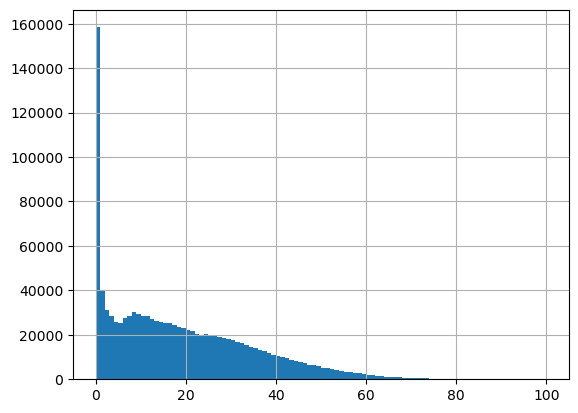

In [55]:
data['popularity'].hist(bins=100)

Entender quais são as músicas mais populares e as menos populares

In [10]:
data.sort_values(by=['popularity'], ascending=False)

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
612503,612503,Miley Cyrus,Flowers,0yLdNVWF3Srea0uzk55zFn,100,2023,pop,0.707,0.681,0,-4.325,1,0.0668,0.063200,0.000005,0.0322,0.646,117.999,200455,4
605178,605178,Bizarrap,"Shakira: Bzrp Music Sessions, Vol. 53",4nrPB8O7Y7wsOCJdgXkthe,96,2023,hip-hop,0.778,0.632,2,-5.600,0,0.0493,0.274000,0.000000,0.0915,0.498,122.104,218289,4
612504,612504,The Weeknd,Die For You - Remix,7oDd86yk8itslrA9HRP2ki,95,2023,pop,0.531,0.525,1,-6.500,0,0.0671,0.232000,0.000000,0.4410,0.502,66.900,232857,4
569184,569184,SZA,Kill Bill,1Qrg8KqiBpW07V7PNxwwwL,94,2022,pop,0.644,0.735,8,-5.747,1,0.0391,0.052100,0.144000,0.1610,0.418,88.980,153947,4
569195,569195,Manuel Turizo,La Bachata,5ww2BF9slyYgNOk37BlC4u,93,2022,pop,0.835,0.679,7,-5.329,0,0.0364,0.583000,0.000002,0.2180,0.850,124.980,162638,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035032,1279261,Starkey,OK Luv (Dev79 Remix),7ft4MX1KeI0jciGXeT53Va,0,2009,dubstep,0.801,0.413,6,-9.565,1,0.2160,0.043700,0.000000,0.1250,0.708,137.010,260893,4
1035033,1279262,Saleem Razvi,Wonderful Thing,2BfOTDmHiARuq2mopHpecK,0,2009,dubstep,0.653,0.963,11,-3.642,0,0.0590,0.000126,0.723000,0.0380,0.690,132.017,397714,4
1035034,1279263,Saleem Razvi,Spanish Fly,5H12C2HBVjX5umgaPqyGYO,0,2009,dubstep,0.768,0.720,1,-9.271,1,0.0720,0.000911,0.942000,0.1160,0.137,134.993,371911,4
1035035,1279264,Saleem Razvi,Feel Alive - Feat. Mina - Original,0FUL1OjsTMMgrrbbVf0GVn,0,2009,dubstep,0.724,0.549,7,-4.928,1,0.0388,0.000124,0.840000,0.1320,0.114,128.003,345339,4


As 5 músicas mais populares são recentes (2022 e 2023), enquanto que as 5 músicas menos populares são anteriores a 2010

Vamos também analisar quais os artistias mais populares

In [13]:
by_artist_name = data.groupby(by=['artist_name']).agg({'tempo':'count', 'popularity':'mean'}).rename(columns={'tempo':'count'}).reset_index().sort_values(by=['popularity'], ascending=False)
by_artist_name[by_artist_name['count'] > 12] # Only show artists with more than N songs

,artist_name,count,popularity
22938,Harry Styles,35,75.685714
41511,Olivia Rodrigo,14,75.428571
6669,Bizarrap,14,74.857143
45548,Rauw Alejandro,26,71.923077
18811,Feid,19,71.894737
...,...,...,...
31730,Laudamus,17,0.000000
13307,Dark Project,18,0.000000
57238,Thirst,15,0.000000
13294,Dark Franklin,15,0.000000


... e quais os artistas com mais músicas

In [14]:
data['artist_name'].value_counts()

artist_name
Traditional              4058
Grateful Dead            2320
Johann Sebastian Bach    2125
Giacomo Meyerbeer        1345
Elvis Presley            1242
                         ... 
Gaia Consort                1
Dzej Ramadanovski           1
Goca Trzan                  1
Robbie O'Connell            1
Sleep Therapist             1
Name: count, Length: 64158, dtype: int64

Vamos também analisar as tendências em cada ano

In [15]:
data.groupby(by=['year']).mean(numeric_only=True)

,Unnamed: 0,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
year,,,,,,,,,,,,,,,
2000,6.577589e+05,10.736181,0.528590,0.604446,5.289912,-10.148483,0.664464,0.084210,0.362329,0.239420,0.219137,0.507284,119.853731,259887.548190,3.876891
2001,7.638582e+05,11.253359,0.524793,0.600322,5.304999,-10.097640,0.663715,0.085461,0.361939,0.245478,0.219772,0.488250,119.115111,261913.330665,3.874501
2002,8.238432e+05,11.679041,0.531639,0.622776,5.305591,-9.587969,0.653152,0.085943,0.339893,0.243533,0.224506,0.498285,119.802349,263335.524369,3.885136
2003,8.862716e+05,12.435730,0.526321,0.627254,5.283657,-9.375994,0.659200,0.087809,0.340997,0.240454,0.224276,0.491708,120.105939,258998.805183,3.875142
2004,9.507355e+05,12.298732,0.530033,0.637659,5.299723,-9.109423,0.650196,0.087039,0.332912,0.228983,0.228731,0.491882,120.454719,258381.273727,3.886840
2005,1.015462e+06,13.424920,0.525539,0.631740,5.320009,-9.267861,0.649223,0.088181,0.333991,0.241071,0.228456,0.487335,120.741856,261665.490566,3.877136
2006,1.082753e+06,13.137903,0.533050,0.634384,5.322668,-9.139491,0.647051,0.089972,0.332268,0.248002,0.224144,0.486790,120.946902,263190.082970,3.884132
2007,1.151329e+06,13.471446,0.533309,0.644446,5.321971,-9.028157,0.644595,0.092813,0.324328,0.251806,0.228937,0.478078,121.062447,264918.808700,3.885546
2008,1.221675e+06,13.462894,0.534577,0.651215,5.297900,-8.763337,0.647306,0.090511,0.310635,0.258509,0.226360,0.476483,122.401332,263923.319763,3.888514


Algumas conclusões interessantes:

- quanto mais próximas do atual, maior é a popularidade da música, excetuando o último ano (2023);

- as músicas tem-se tornado mais enérgicas;

- e têm perdido acústica e valência;

- têm ficado mais curtas;

Vamos verificar se os anos de lançamento das músicas estão bem distribuídos

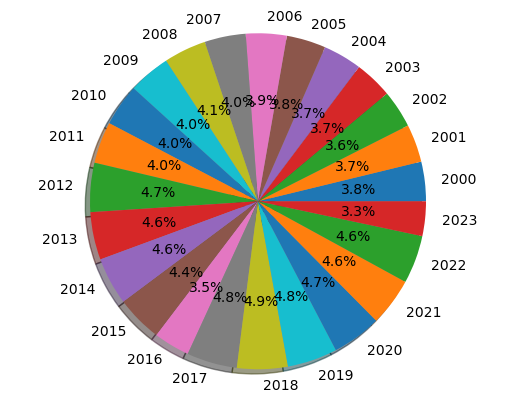

In [16]:
labels = data['year'].astype('category').cat.categories.tolist()
counts = data['year'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

In [54]:
new_data = data[data['popularity'] <= 1]
new_data['year'].value_counts()

year
2000    13848
2001    12618
2002    12141
2004    11613
2003    11379
2008    11348
2006    11037
2007    10882
2005    10298
2009     9632
2012     8679
2023     8669
2010     8613
2011     8252
2013     7989
2014     7060
2015     6113
2017     5420
2018     4904
2020     4000
2019     3929
2016     3693
2021     3346
2022     2748
Name: count, dtype: int64

Verificamos que sim

Vamos agora realizar uma análise dos dados das músicas agrupadas por género

In [17]:
data.groupby(by=['genre']).mean(numeric_only=True).sort_values(by=['popularity'], ascending=False)

,Unnamed: 0,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
genre,,,,,,,,,,,,,,,,
pop,687413.487410,55.685806,2011.413633,0.591804,0.621308,5.199198,-6.886746,0.675862,0.067890,0.296180,0.023266,0.180150,0.490589,122.231822,226688.853408,3.932799
hip-hop,633664.317137,46.315736,2012.698529,0.711836,0.671360,5.300834,-6.657922,0.553334,0.209123,0.173402,0.018546,0.214033,0.521298,119.598942,215730.925747,3.974973
rock,618415.312444,46.228985,2012.956312,0.561714,0.661280,5.251281,-7.107991,0.683037,0.060313,0.223403,0.071993,0.193011,0.499320,123.465617,233152.755047,3.936728
dance,663421.193702,43.034337,2011.255752,0.658539,0.725452,5.327097,-5.877088,0.565013,0.099444,0.131716,0.063779,0.195262,0.538534,121.728344,223404.429933,3.978794
metal,597260.075499,39.698860,2013.672507,0.427253,0.882898,5.197863,-4.846604,0.546154,0.096246,0.027337,0.090660,0.241166,0.347291,130.452288,243614.999430,3.904843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chicago-house,541180.022824,3.260542,2014.660542,0.774285,0.748278,5.769052,-8.705806,0.530368,0.075915,0.032253,0.525092,0.138774,0.570474,125.026535,385620.022631,3.995938
detroit-techno,572376.108929,2.953827,2014.591327,0.730965,0.732981,5.681633,-10.303683,0.531122,0.072965,0.055777,0.745791,0.130062,0.451984,127.677153,381361.918622,3.977551
grindcore,652164.506100,2.647805,2012.433662,0.267414,0.921175,5.248811,-5.814207,0.659935,0.133797,0.012155,0.521953,0.288697,0.197231,117.839448,120561.594459,3.710180


Tal como era expectável, o pop é o género mais popular, em termos médios

Vamos também analisar qual a time_signature mais popular

In [18]:
data.groupby(by=['time_signature']).mean(numeric_only=True).sort_values(by=['popularity'], ascending=False)

,Unnamed: 0,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
time_signature,,,,,,,,,,,,,,,
4,658233.531923,18.672898,2011.975094,0.555467,0.666106,5.306888,-8.423481,0.631137,0.087476,0.285799,0.242107,0.220817,0.473268,121.995072,251274.030677
0,604988.784202,17.741042,2012.464169,0.008270,0.329559,4.854235,-17.701136,0.670195,0.003408,0.384399,0.570526,0.316134,0.006525,2.789208,186132.426710
3,667034.452979,16.609791,2011.741356,0.419745,0.461082,5.150002,-12.454381,0.665385,0.115249,0.562418,0.313276,0.233339,0.339665,119.913022,244682.085684
5,656605.190110,16.029295,2012.162039,0.423001,0.472472,5.206856,-13.279957,0.628438,0.192361,0.558401,0.324018,0.250357,0.341240,113.833712,219070.703292
1,664082.056556,15.299131,2011.823144,0.400500,0.445952,5.172986,-14.089773,0.650474,0.148834,0.603191,0.369036,0.248783,0.320668,110.167710,217403.357741


## Missing Values

Vamos verificar a existência de missing values

<Axes: >

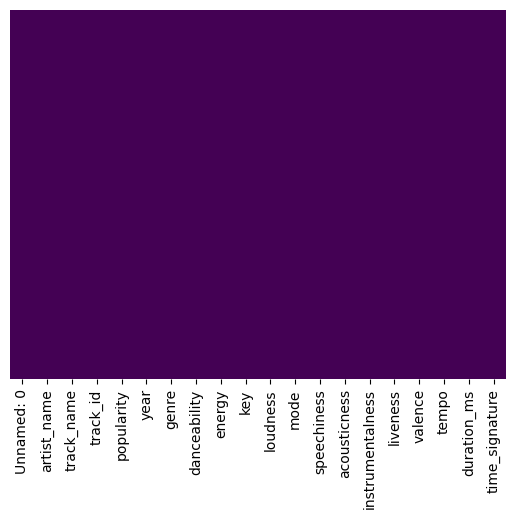

In [11]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Como podemos ver, não há missing values no nosso dataset.

## Correlações

First, we need to convert categorical variables to numerical, using label encoding

In [ ]:
le = preprocessing.LabelEncoder()
data_categorical_encoded = data.copy()


data_categorical_encoded['genre'] = le.fit_transform(data['genre'])
data_categorical_encoded['artist_name']= le.fit_transform(data['artist_name'])

data_categorical_encoded.head()

### Correlação de pearson

<Axes: >

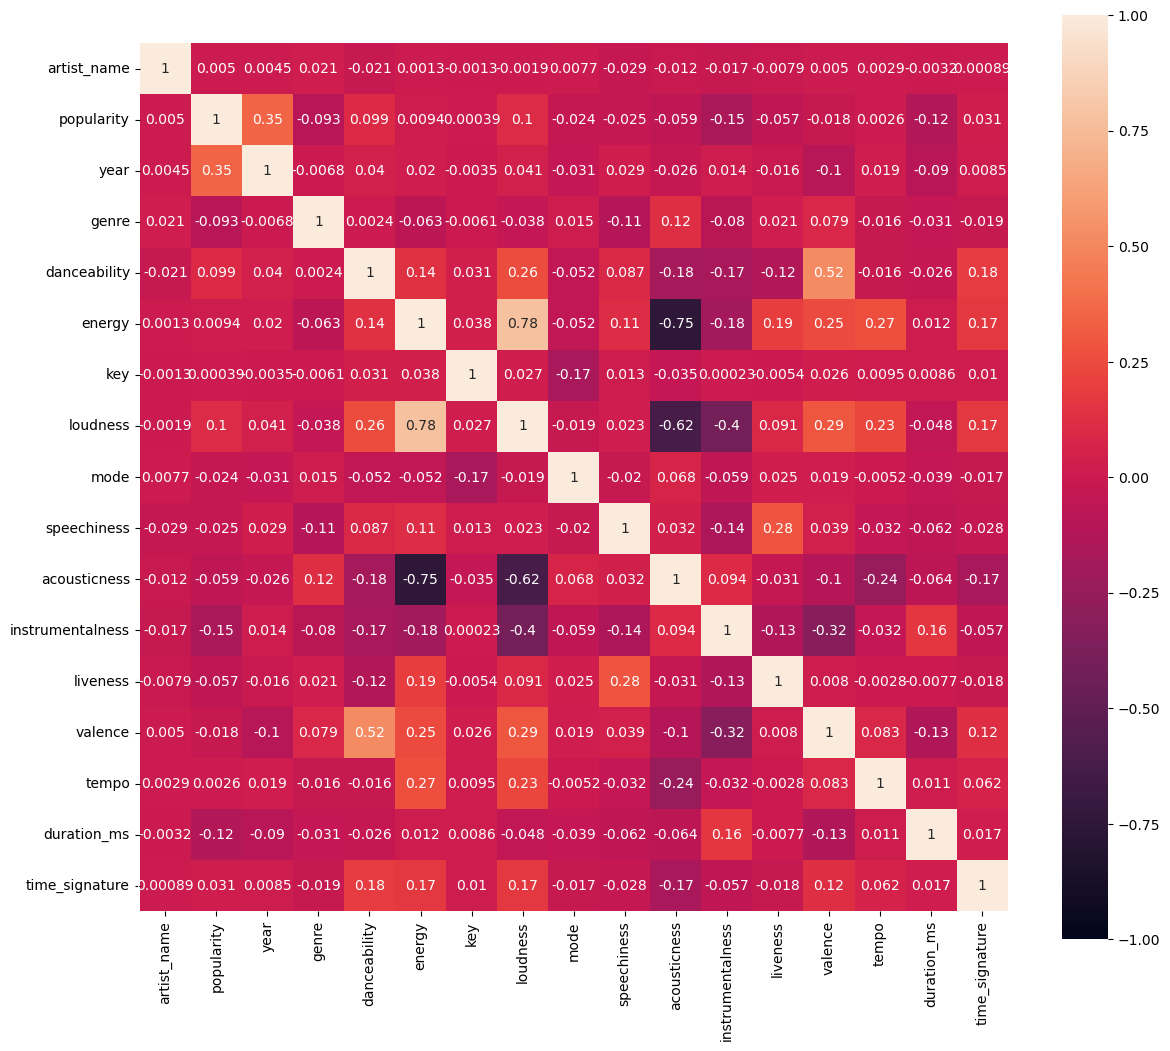

In [38]:
corr_matrix = data_categorical_encoded.corr(method='pearson', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

### Correlação de Spearman

<Axes: >

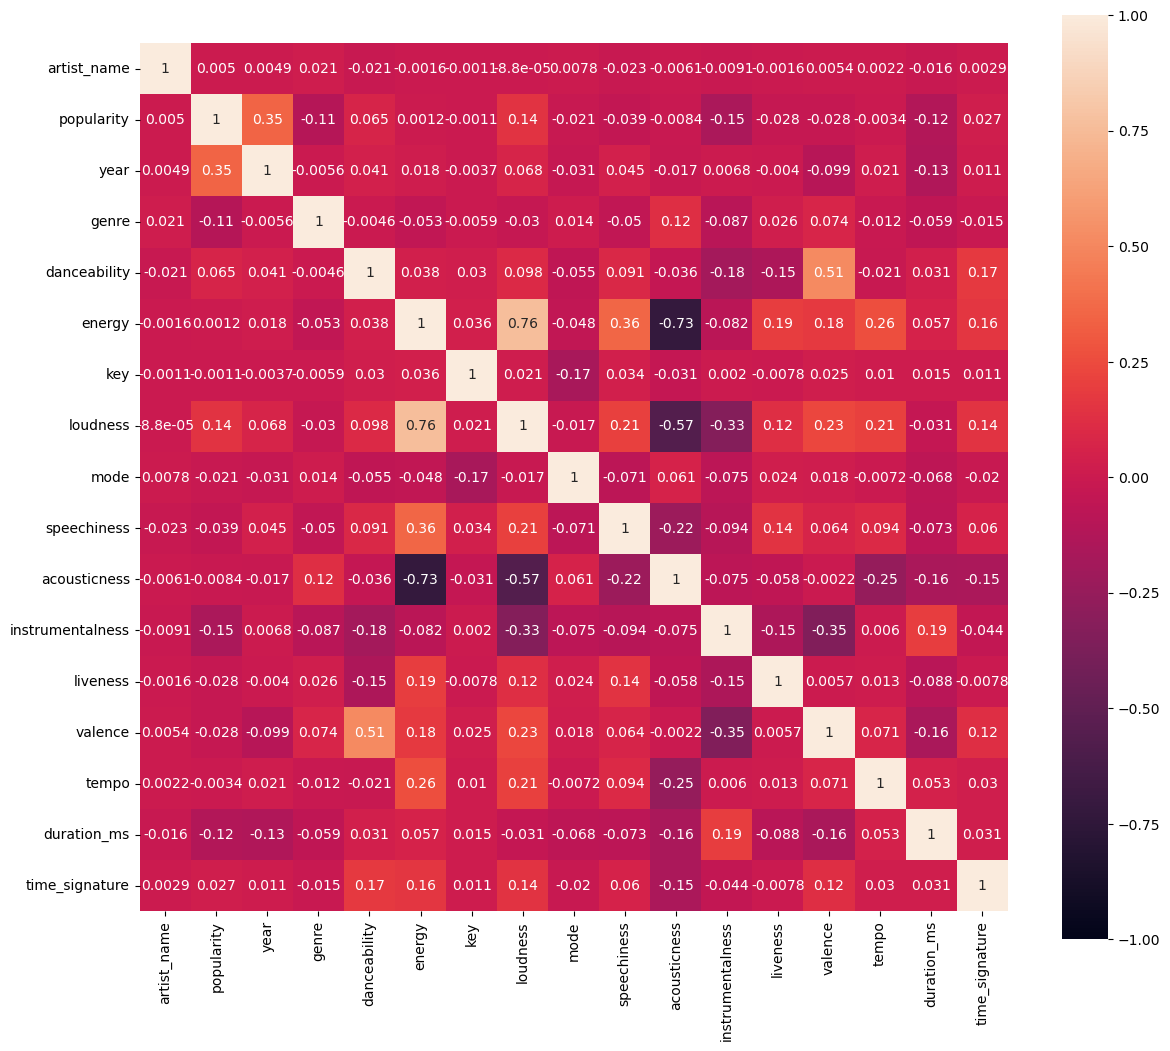

In [39]:
corr_matrix = data_categorical_encoded.corr(method='spearman', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

### Correlação de Kendall

<Axes: >

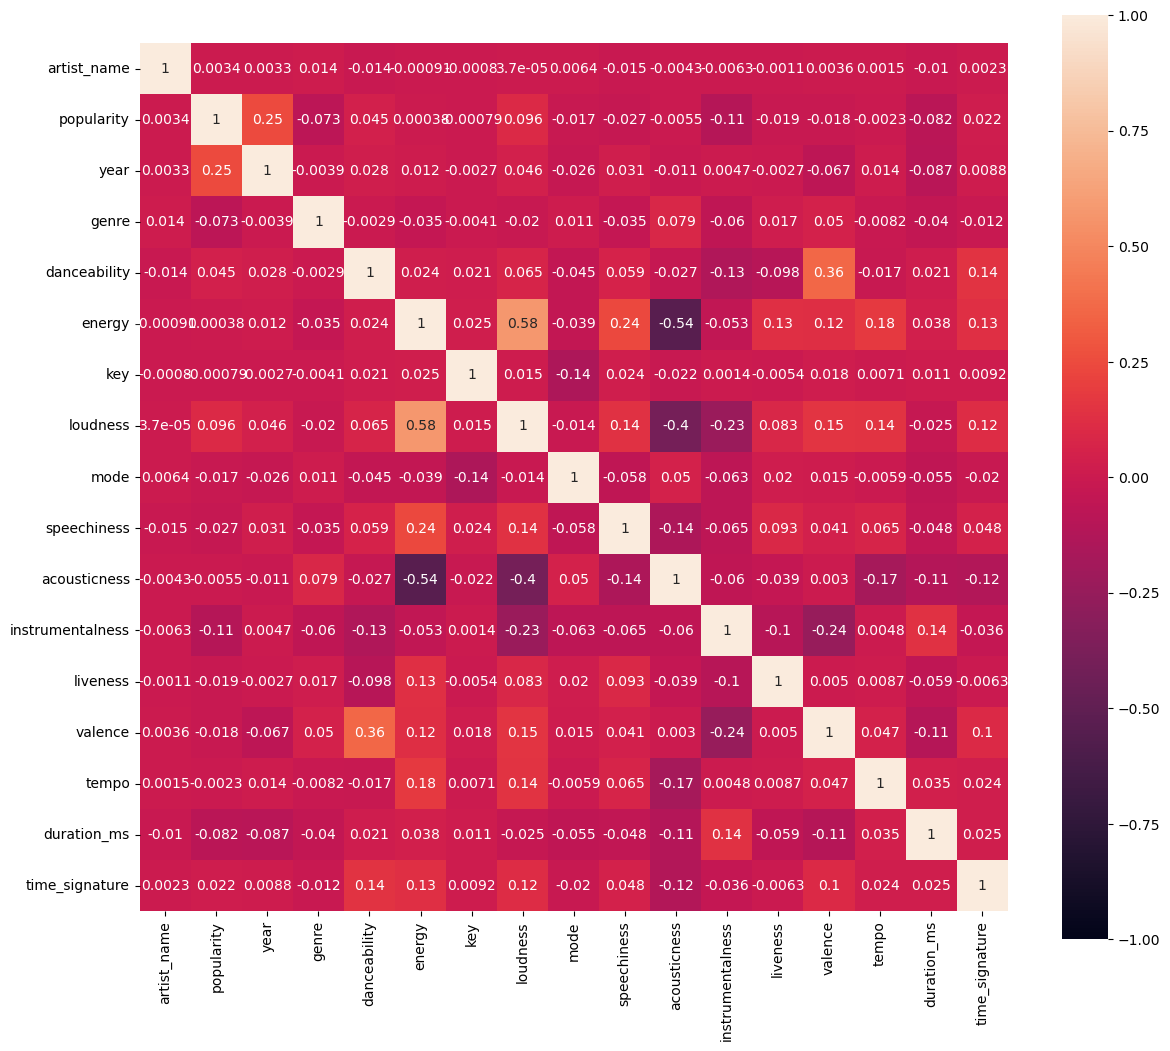

In [40]:
corr_matrix = data_categorical_encoded.corr(method='kendall', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

Das 3 correlações analisadas podemos ver que as features com maior correlação com a popularidade são:

- year (0.25);

- loudness (0.1);

- instrumentalness (-0.15);

- duration_ms (-0.12);

Podemos também visualizar a distribuição dos dados coluna vs coluna

In [41]:
# muito demorado
# sns.pairplot(data, hue='popularity')

## Outliers

Dançabilidade

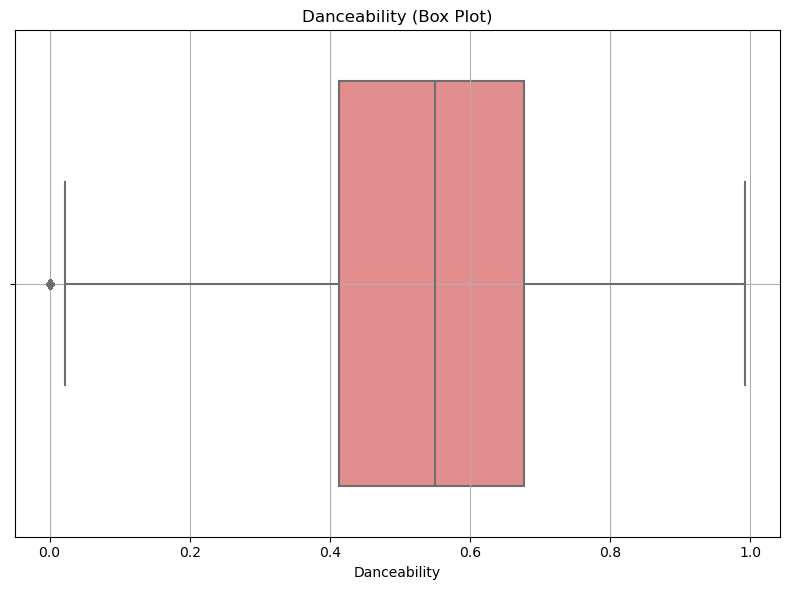

In [58]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_categorical_encoded['danceability'], color='lightcoral')
    
plt.title('Danceability (Box Plot)')
plt.xlabel('Danceability')
    
plt.grid(True)
plt.tight_layout()
plt.show()

In [59]:
data[data['danceability'] == 0]

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
3718,Yellow Eyes,Cathedral,31,2012,black-metal,0.0,0.000020,7,-6.884,1,0.0,0.1220,0.647000,0.1450,0.0,0.0,282593,0
9177,Benjamin Britten,"Gloriana, Op. 53: Choral Dances: No. 3. Time a...",17,2012,classical,0.0,0.093500,5,-21.989,1,0.0,0.9920,0.000273,0.0711,0.0,0.0,78760,0
10557,Papa Razzi and the Photogs,"Jeremy Renner, You Are a Good Actor, Yes You Are!",15,2012,comedy,0.0,0.217000,7,-11.763,1,0.0,0.9140,0.000000,0.2680,0.0,0.0,70867,0
21277,Bahamas,Any Other Way,21,2012,folk,0.0,0.225000,0,-13.201,1,0.0,0.8780,0.000000,0.2810,0.0,0.0,63227,0
27315,Napalm Death,Your Achievement,0,2012,grindcore,0.0,0.427000,0,-8.277,0,0.0,0.0175,0.374000,0.0000,0.0,0.0,6467,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156058,Nature Sounds,Powerful Cleansing Rain,12,2011,sleep,0.0,0.000866,5,-11.721,1,0.0,0.1500,0.654000,0.5030,0.0,0.0,2015766,0
1156337,Nature Sounds,Powerful Niagara Falls,6,2011,sleep,0.0,0.000866,5,-11.721,1,0.0,0.1500,0.654000,0.5030,0.0,0.0,2015766,0
1156343,Thunderstorm,Cicadas After the Rain,7,2011,sleep,0.0,0.003320,3,-38.975,1,0.0,0.0159,0.555000,0.3230,0.0,0.0,413363,0
1157230,Alonso Lobo,Lamentations Ieremiae Prophetae: Teth III,12,2011,spanish,0.0,0.042100,11,-29.392,0,0.0,0.9920,0.931000,0.0752,0.0,0.0,53293,0


Energia

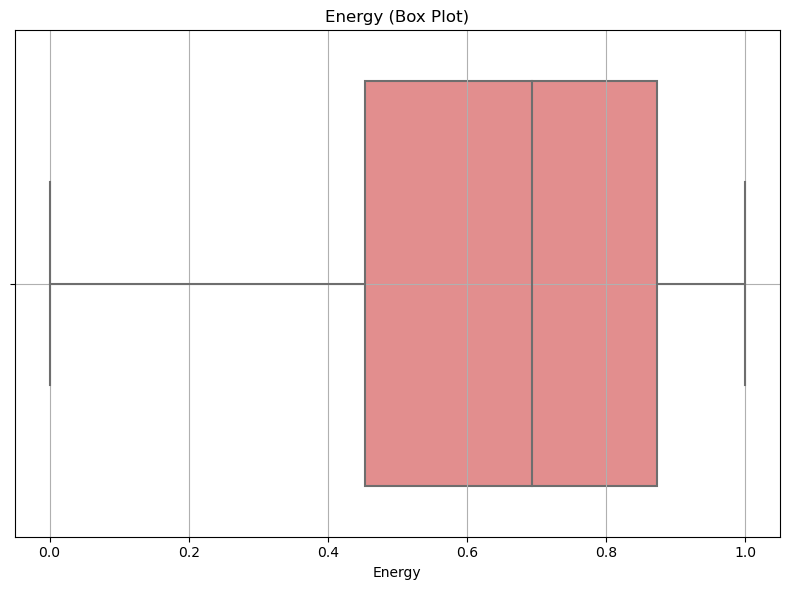

In [60]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_categorical_encoded['energy'], color='lightcoral')
    
plt.title('Energy (Box Plot)')
plt.xlabel('Energy')
    
plt.grid(True)
plt.tight_layout()
plt.show()

Loudness

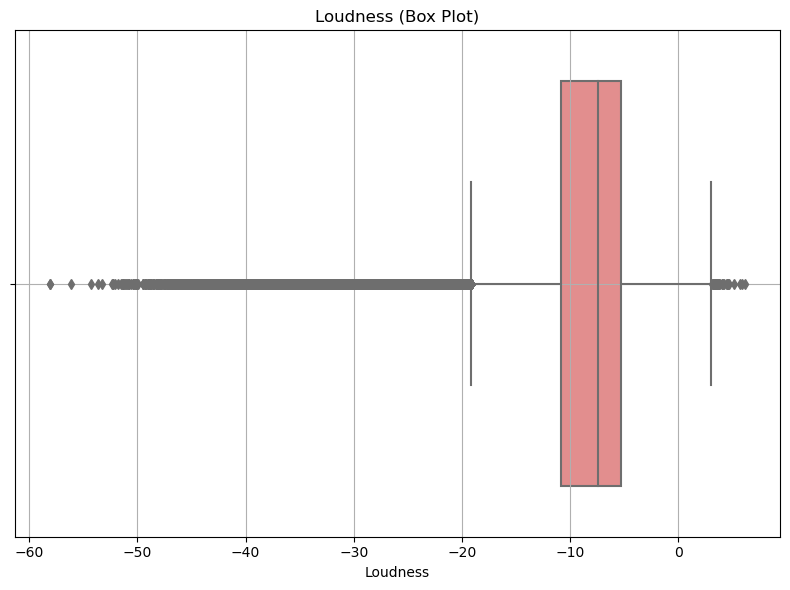

In [61]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_categorical_encoded['loudness'], color='lightcoral')
    
plt.title('Loudness (Box Plot)')
plt.xlabel('Loudness')
    
plt.grid(True)
plt.tight_layout()
plt.show()

In [66]:
data[data['loudness'] > 6]

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
63903,Five Star Hotel,Way Out,1,2013,club,0.496,0.992,11,6.172,1,0.0582,0.000419,0.0283,0.0925,0.51,199.956,501600,4


Popularidade

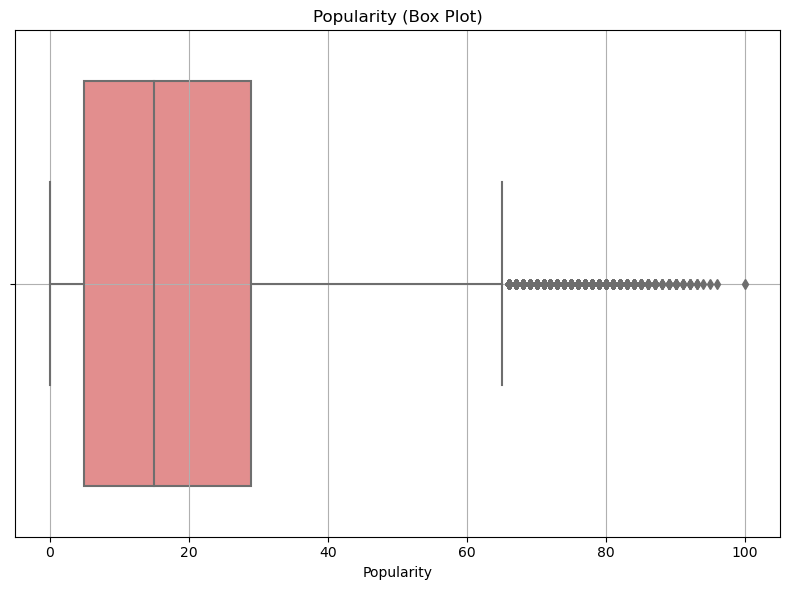

In [57]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_categorical_encoded['popularity'], color='lightcoral')
    
plt.title('Popularity (Box Plot)')
plt.xlabel('Popularity')
    
plt.grid(True)
plt.tight_layout()
plt.show()

Speechiness

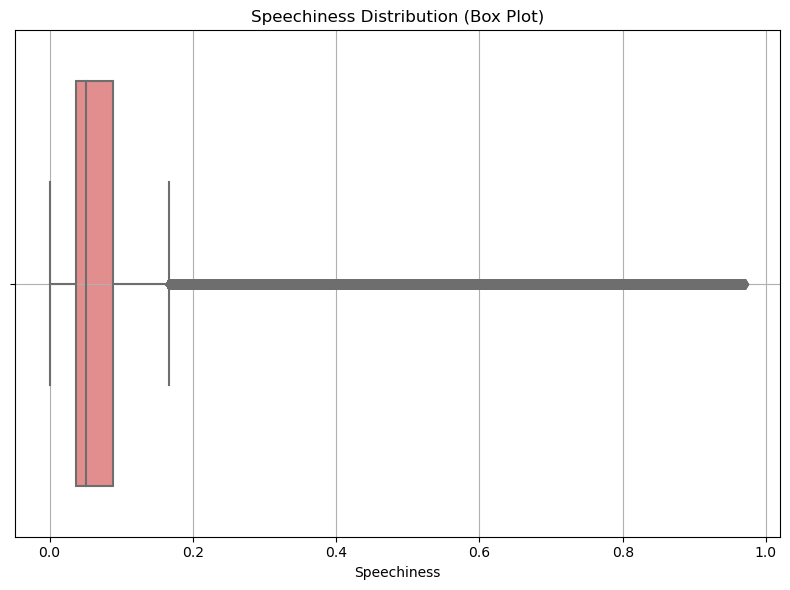

In [67]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_categorical_encoded['speechiness'], color='lightcoral')
    
plt.title('Speechiness Distribution (Box Plot)')
plt.xlabel('Speechiness')
    
plt.grid(True)
plt.tight_layout()
plt.show()

Accousticness

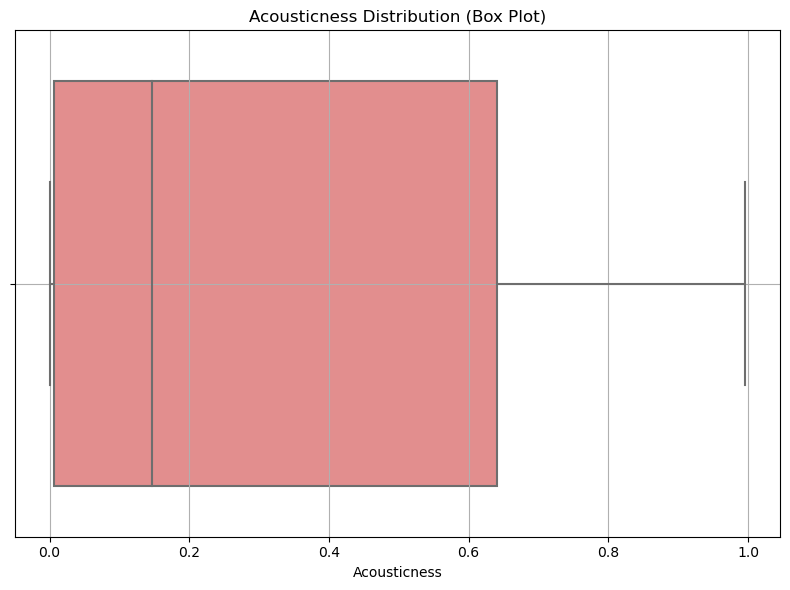

In [69]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_categorical_encoded['acousticness'], color='lightcoral')
    
plt.title('Acousticness Distribution (Box Plot)')
plt.xlabel('Acousticness')
    
plt.grid(True)
plt.tight_layout()
plt.show()

Instrumentalness

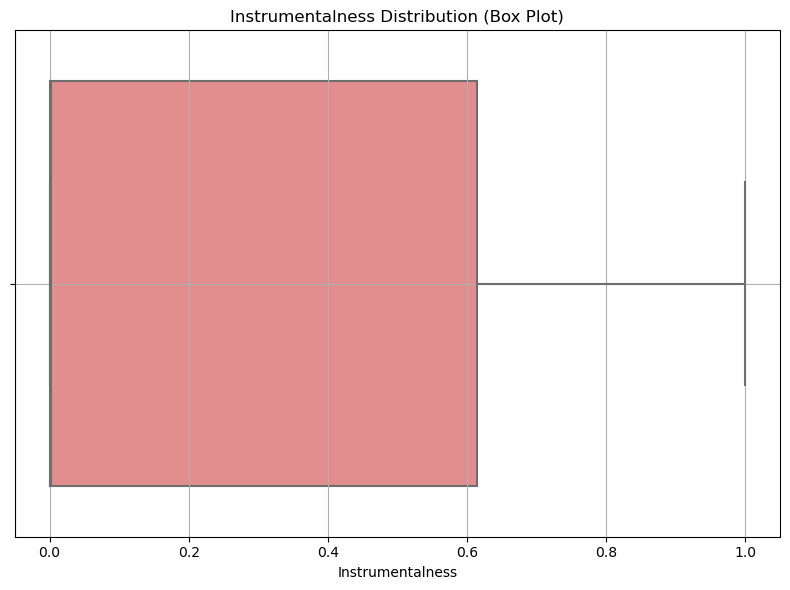

In [70]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_categorical_encoded['instrumentalness'], color='lightcoral')
    
plt.title('Instrumentalness Distribution (Box Plot)')
plt.xlabel('Instrumentalness')
    
plt.grid(True)
plt.tight_layout()
plt.show()

Liveness

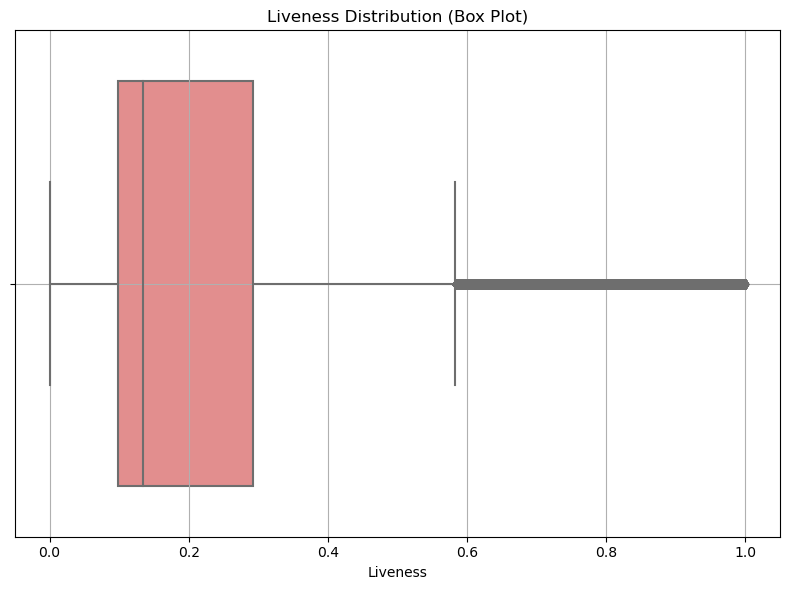

In [71]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_categorical_encoded['liveness'], color='lightcoral')
    
plt.title('Liveness Distribution (Box Plot)')
plt.xlabel('Liveness')
    
plt.grid(True)
plt.tight_layout()
plt.show()

Valence

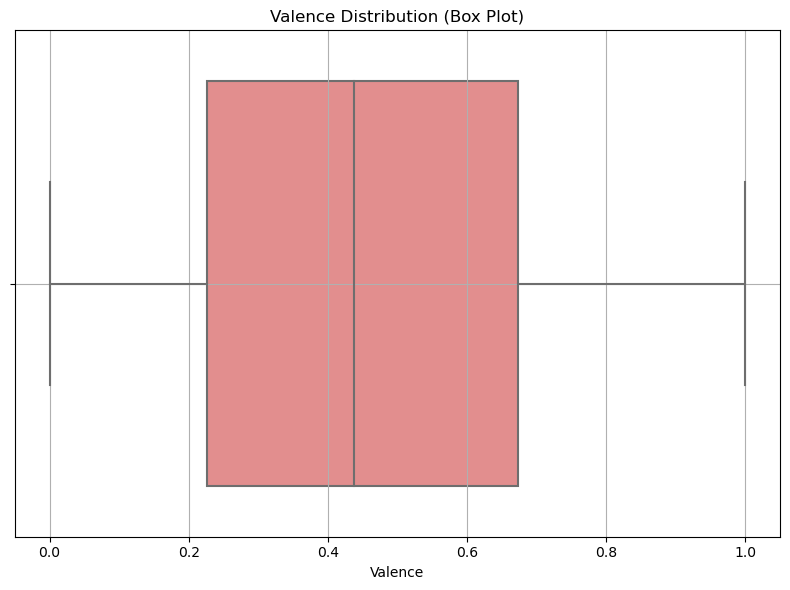

In [72]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_categorical_encoded['valence'], color='lightcoral')
    
plt.title('Valence Distribution (Box Plot)')
plt.xlabel('Valence')
    
plt.grid(True)
plt.tight_layout()
plt.show()

Tempo

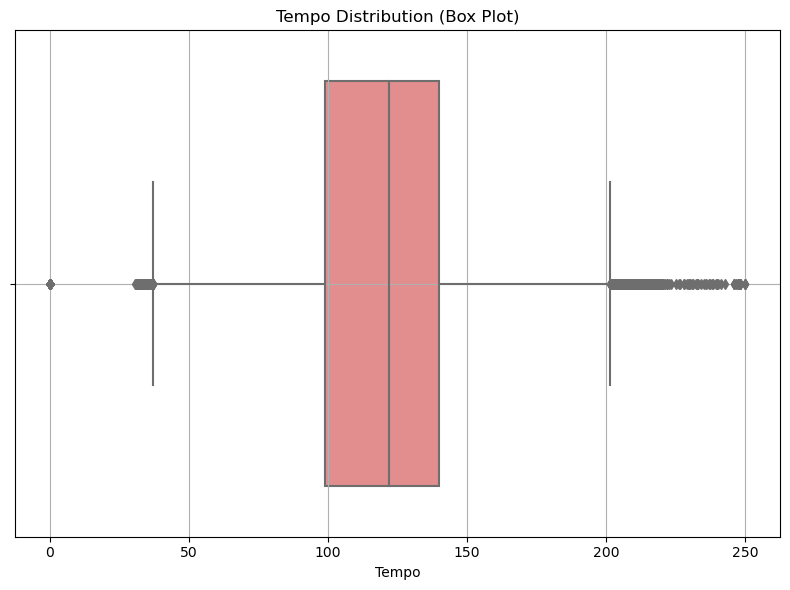

In [73]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_categorical_encoded['tempo'], color='lightcoral')
    
plt.title('Tempo Distribution (Box Plot)')
plt.xlabel('Tempo')
    
plt.grid(True)
plt.tight_layout()
plt.show()

In [76]:
data[data['tempo'] == 0]
# Os mesmos dados que possuem danceability = 0

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
3718,Yellow Eyes,Cathedral,31,2012,black-metal,0.0,0.000020,7,-6.884,1,0.0,0.1220,0.647000,0.1450,0.0,0.0,282593,0
9177,Benjamin Britten,"Gloriana, Op. 53: Choral Dances: No. 3. Time a...",17,2012,classical,0.0,0.093500,5,-21.989,1,0.0,0.9920,0.000273,0.0711,0.0,0.0,78760,0
10557,Papa Razzi and the Photogs,"Jeremy Renner, You Are a Good Actor, Yes You Are!",15,2012,comedy,0.0,0.217000,7,-11.763,1,0.0,0.9140,0.000000,0.2680,0.0,0.0,70867,0
21277,Bahamas,Any Other Way,21,2012,folk,0.0,0.225000,0,-13.201,1,0.0,0.8780,0.000000,0.2810,0.0,0.0,63227,0
27315,Napalm Death,Your Achievement,0,2012,grindcore,0.0,0.427000,0,-8.277,0,0.0,0.0175,0.374000,0.0000,0.0,0.0,6467,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156058,Nature Sounds,Powerful Cleansing Rain,12,2011,sleep,0.0,0.000866,5,-11.721,1,0.0,0.1500,0.654000,0.5030,0.0,0.0,2015766,0
1156337,Nature Sounds,Powerful Niagara Falls,6,2011,sleep,0.0,0.000866,5,-11.721,1,0.0,0.1500,0.654000,0.5030,0.0,0.0,2015766,0
1156343,Thunderstorm,Cicadas After the Rain,7,2011,sleep,0.0,0.003320,3,-38.975,1,0.0,0.0159,0.555000,0.3230,0.0,0.0,413363,0
1157230,Alonso Lobo,Lamentations Ieremiae Prophetae: Teth III,12,2011,spanish,0.0,0.042100,11,-29.392,0,0.0,0.9920,0.931000,0.0752,0.0,0.0,53293,0


Duração

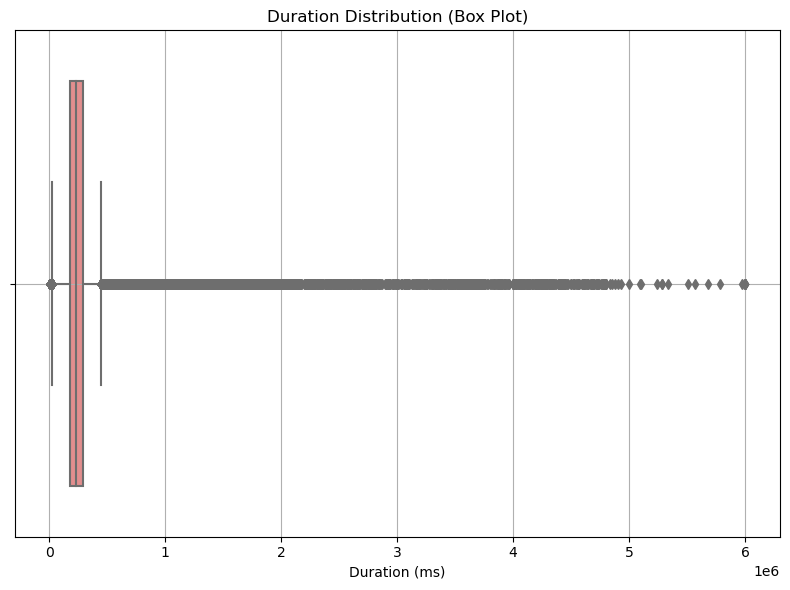

In [56]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_categorical_encoded['duration_ms'], color='lightcoral')
    
plt.title('Duration Distribution (Box Plot)')
plt.xlabel('Duration (ms)')
    
plt.grid(True)
plt.tight_layout()
plt.show()

## Multivariate analysis

Vamos verificar a distribuição da popularidade pelo género

/home/miguel/miniconda3/envs/firstCondaEnv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x800 with 0 Axes>

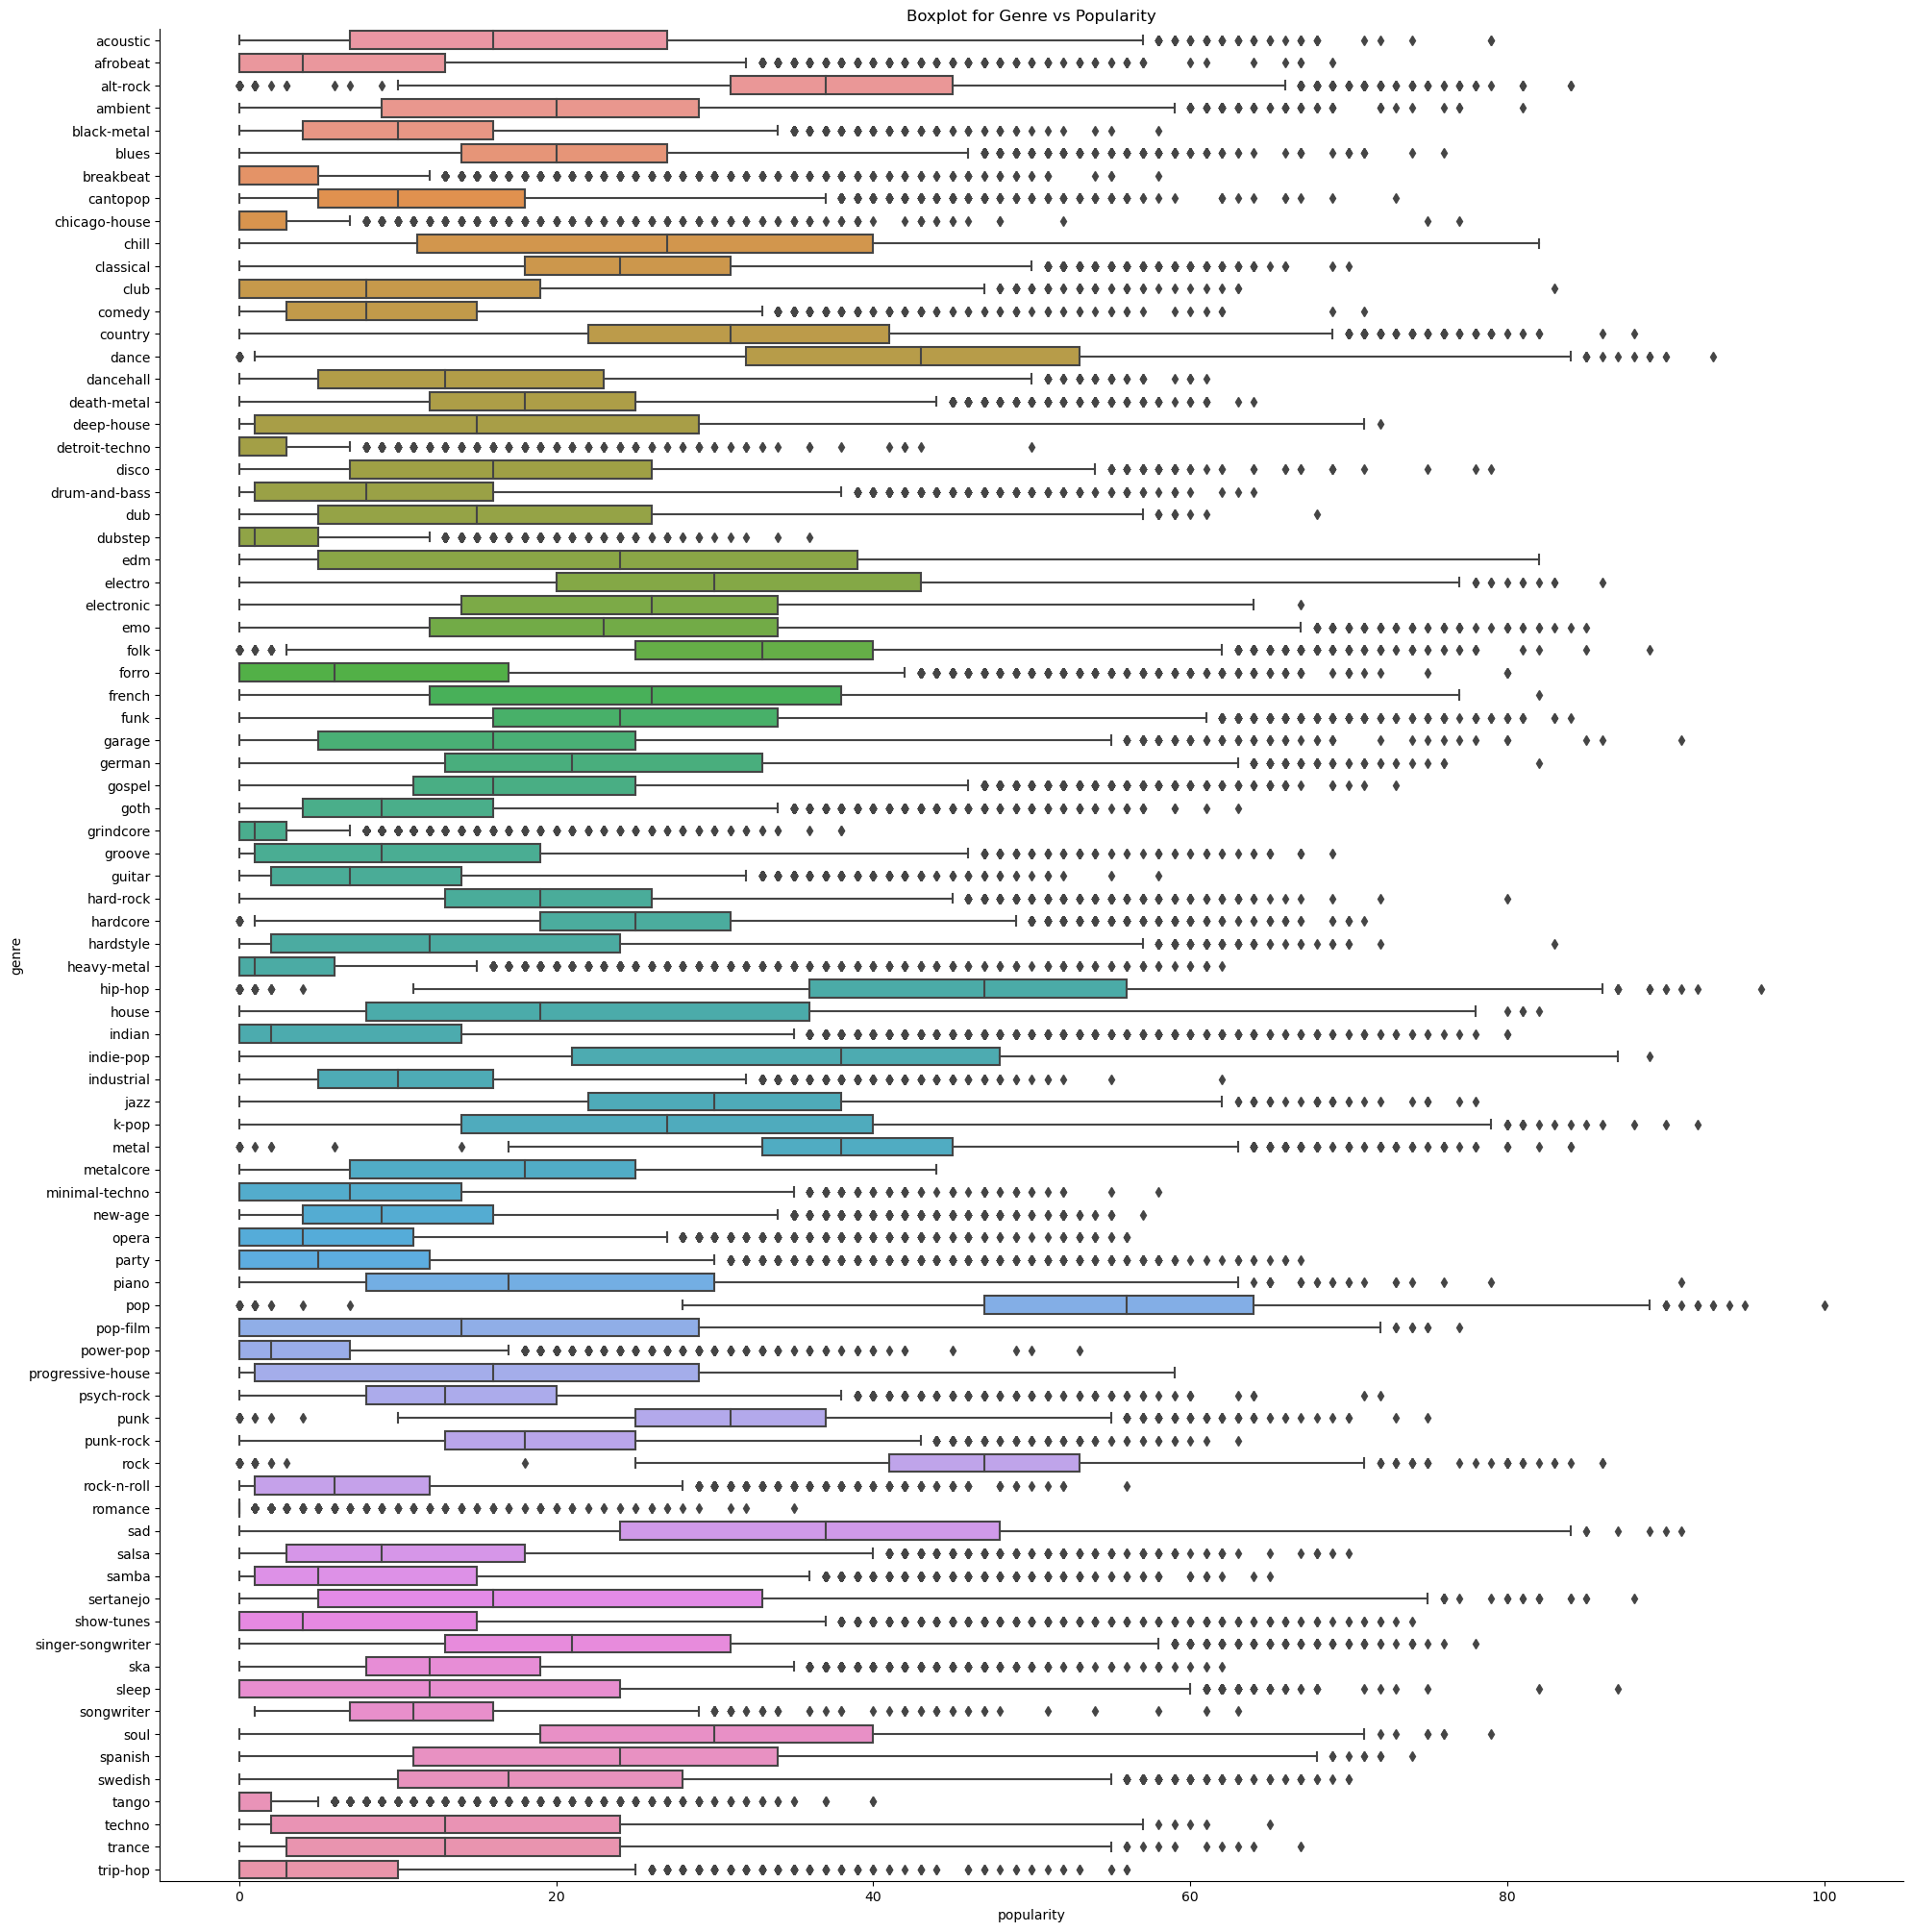

In [42]:
fig = plt.figure(figsize=(16, 8))
sns.catplot(y='genre', x='popularity', data=data, kind='box', aspect=1, orient='h', height=20)
plt.title('Boxplot for Genre vs Popularity')
plt.show()

Vamos também verificar as correlações para géneros específicos de música

In [44]:
data_pop = data.copy()
data_pop = data_pop[data_pop['genre'] == 'pop']
data_pop.head()

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
40342,Bruno Mars,When I Was Your Man,87,2012,pop,0.612,0.280,0,-8.648,1,0.0434,0.93200,0.0,0.0880,0.387,72.795,213827,4
40343,Rihanna,Diamonds,75,2012,pop,0.564,0.710,11,-4.920,0,0.0461,0.00125,0.0,0.1090,0.393,91.972,225147,4
40344,Rihanna,Pour It Up,74,2012,pop,0.785,0.478,2,-8.735,1,0.0419,0.02540,0.0,0.0901,0.390,134.002,161200,4
40345,Rihanna,Loveeeeeee Song,72,2012,pop,0.710,0.598,5,-7.598,0,0.0319,0.50800,0.0,0.0971,0.501,119.981,256320,4
40346,One Direction,What Makes You Beautiful,82,2012,pop,0.726,0.787,4,-2.494,1,0.0737,0.00900,0.0,0.0596,0.888,124.990,199987,4


<Axes: >

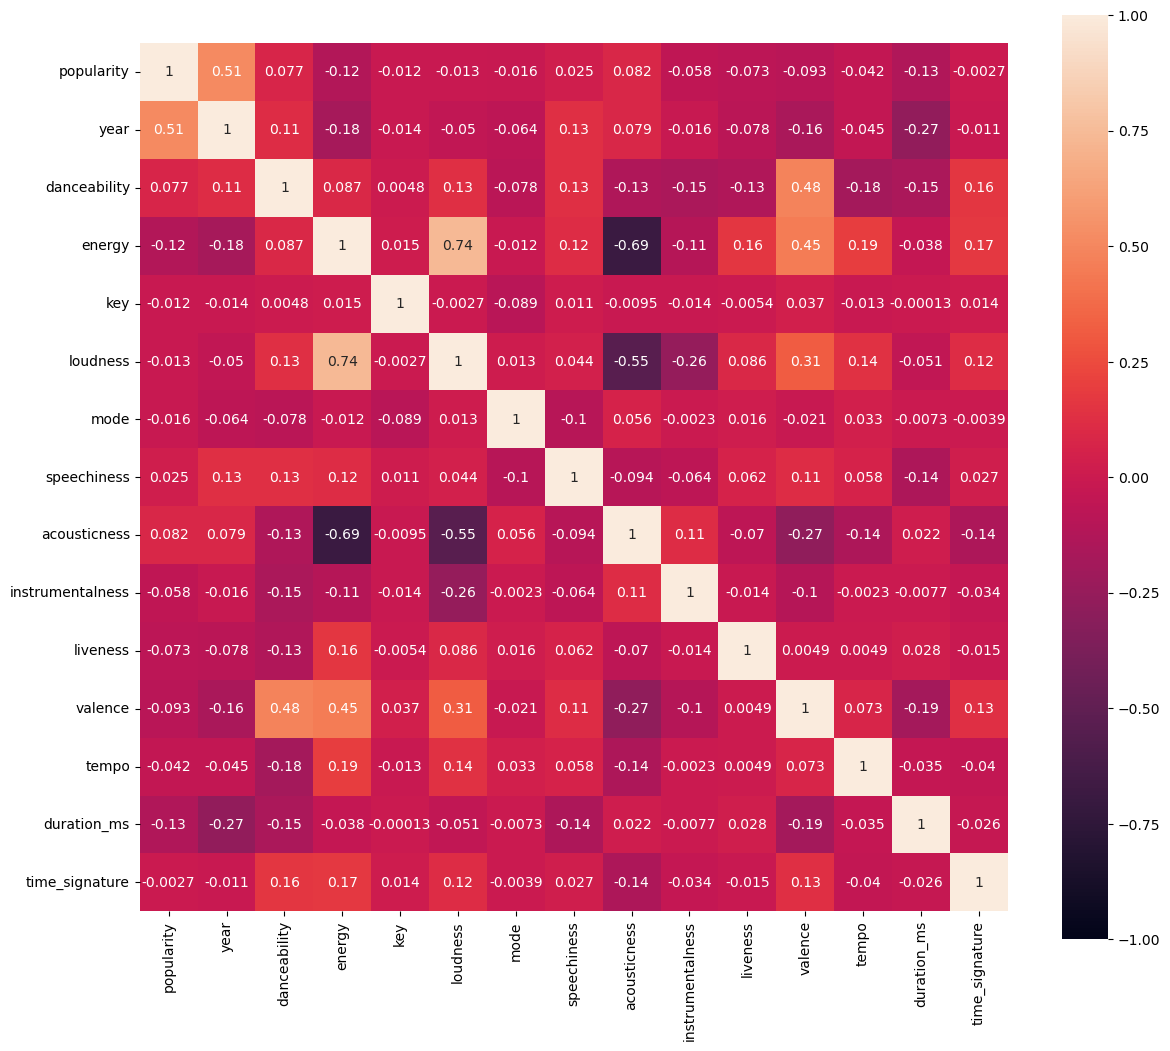

In [45]:
# Pearson Method
corr_matrix = data_pop.corr(method='pearson', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

Verificamos que para o género pop, a energia da música tem um fator mais preponderante na sua popularidade

In [46]:
data_gospel = data.copy()
data_gospel = data_gospel[data_gospel['genre'] == 'gospel']
data_gospel.head()

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
25284,Tamela Mann,Take Me to the King (feat. Kirk Franklin),52,2012,gospel,0.461,0.413,6,-6.914,1,0.0327,0.1970,0.000002,0.312,0.351,115.568,287573,4
25285,Amber Bullock,Lord You've Been So Good,45,2012,gospel,0.390,0.654,0,-3.613,1,0.2910,0.0288,0.000000,0.123,0.873,182.979,213620,4
25286,Anthony Brown & group therAPy,Testimony,44,2012,gospel,0.630,0.900,2,-5.548,1,0.2320,0.1060,0.000000,0.331,0.769,165.923,257093,4
25287,Marvin Winans,Draw Me Close/Thy Will Be Done,44,2012,gospel,0.508,0.304,1,-11.672,1,0.0337,0.7770,0.000000,0.178,0.154,102.739,385985,4
25288,Jonathan McReynolds,No Gray,46,2012,gospel,0.570,0.459,3,-7.494,1,0.1100,0.6810,0.000000,0.108,0.691,78.803,250078,4


<Axes: >

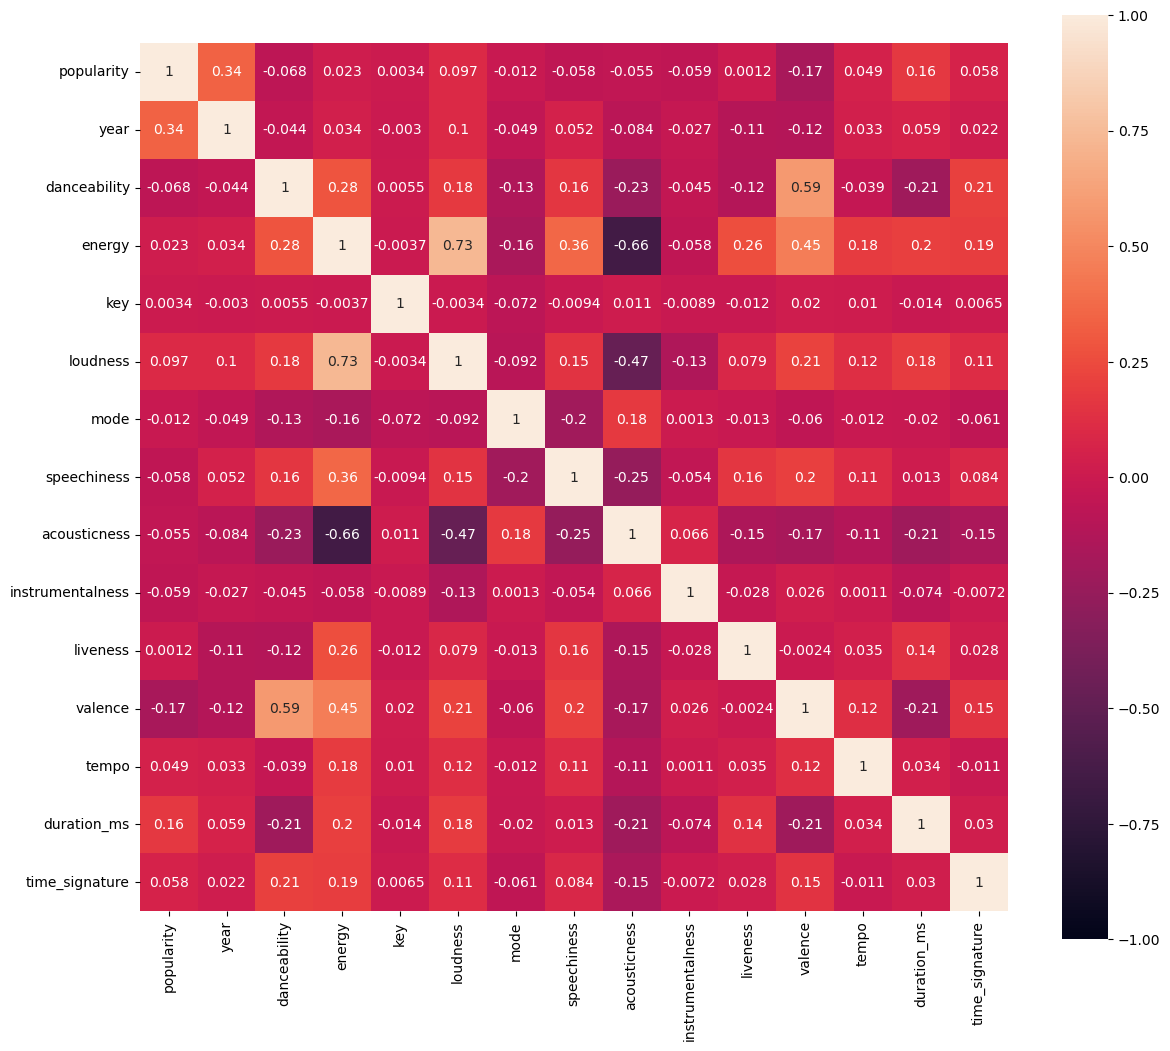

In [47]:
# Pearson Method
corr_matrix = data_gospel.corr(method='pearson', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

Já para a música gospel, a feature 'valence' passa a ter uma maior correlação com a popularidade

In [50]:
data_rock = data.copy()
data_rock = data_rock[data_rock['genre'] == 'metal']
data_rock.head()

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
36378,Linkin Park,BURN IT DOWN,74,2012,metal,0.585,0.972,9,-4.450,0,0.0534,0.01430,0.000000,0.0707,0.585,110.006,230253,4
36379,Halestorm,I Miss the Misery,62,2012,metal,0.469,0.969,0,-2.219,1,0.0589,0.00900,0.000011,0.3460,0.476,164.042,183507,4
36380,Linkin Park,CASTLE OF GLASS,73,2012,metal,0.615,0.911,1,-3.584,0,0.0278,0.06860,0.001880,0.0908,0.685,108.000,205400,4
36381,Shinedown,Enemies,63,2012,metal,0.507,0.966,1,-2.635,1,0.0460,0.00159,0.000000,0.3360,0.502,136.035,188093,4
36382,In This Moment,Whore,63,2012,metal,0.604,0.883,11,-3.821,0,0.0470,0.02540,0.000000,0.0813,0.544,90.001,245533,4


<Axes: >

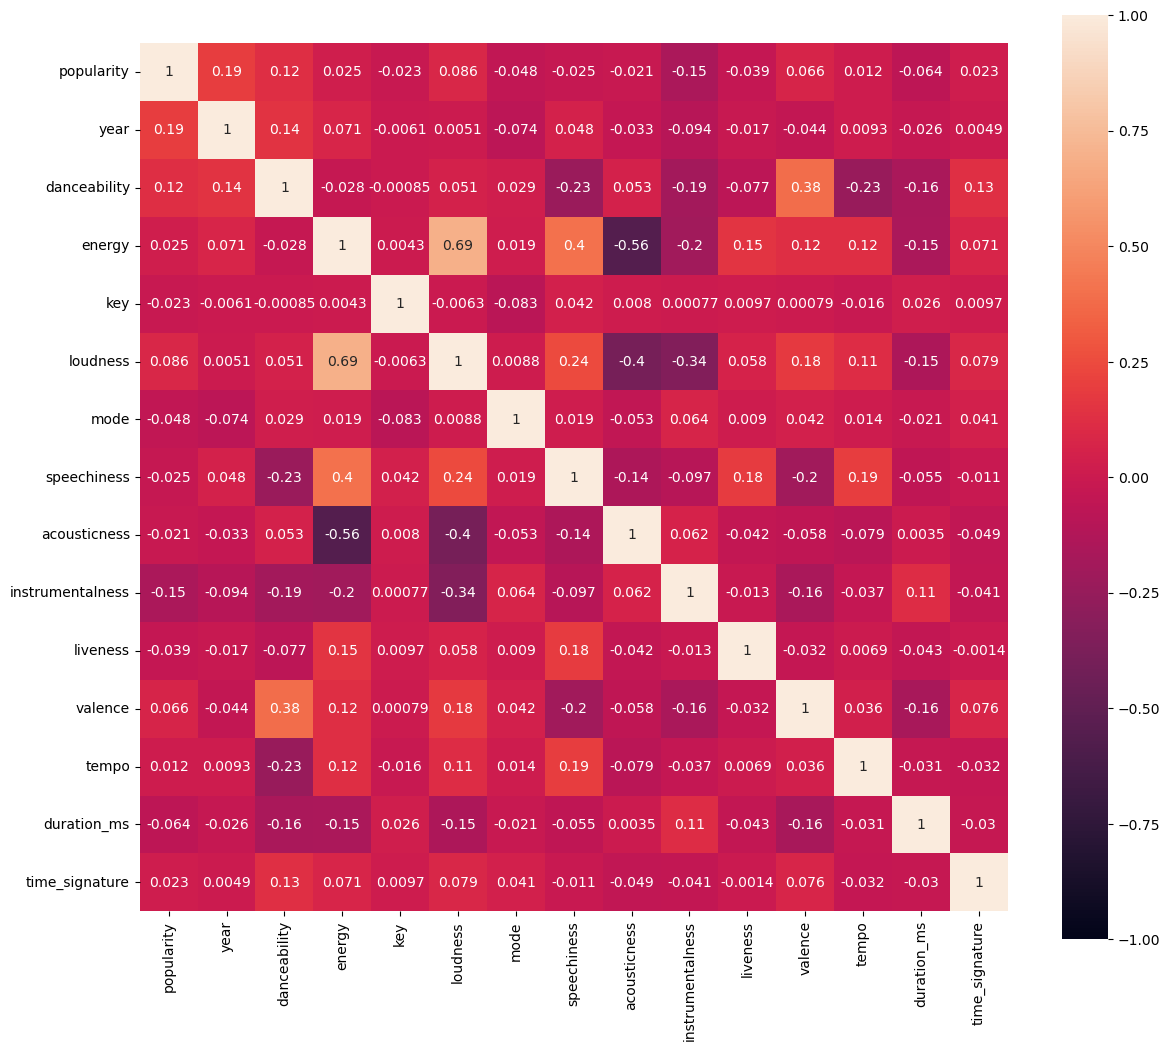

In [51]:
# Pearson Method
corr_matrix = data_rock.corr(method='pearson', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

Podemos concluir que, para diferentes géneros, a popularidade da música depende de diferentes fatores